# 基础复杂网络编程实践

In [65]:
import networkx as nx
import pandas as pd
G = nx.Graph() # create a graph
G.add_nodes_from([1, 2, 3, 4]) # add nodes
G.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4)]) # add edges


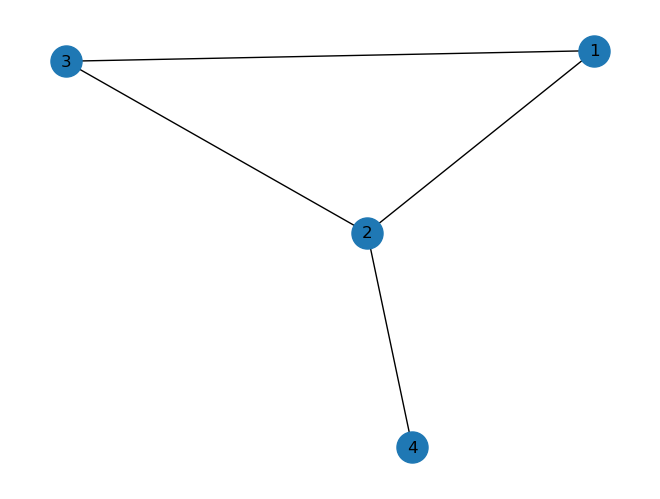

In [66]:
# 可视化
nx.draw(G,node_size=500,with_labels=True)

# 图的连接矩阵

In [67]:
As =nx.to_numpy_matrix(G)
print(As)

[[0. 1. 1. 0.]
 [1. 0. 1. 1.]
 [1. 1. 0. 0.]
 [0. 1. 0. 0.]]


# 已知邻接矩阵创建图

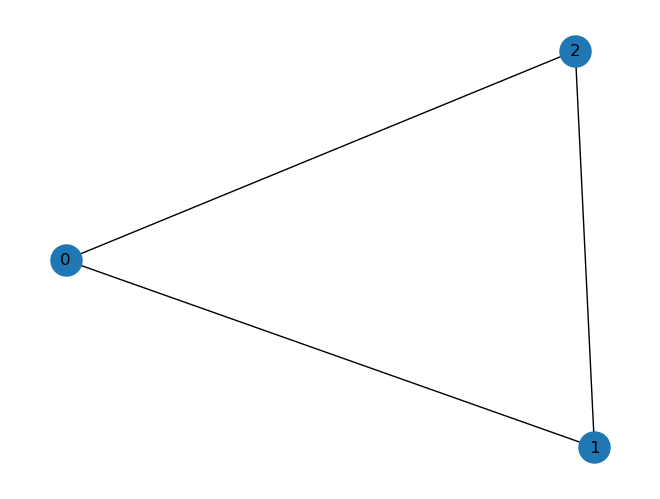

In [68]:
import numpy as np
import matplotlib.pyplot as plta
A = np.array([[0, 1, 1],[1, 0, 1],[1, 1, 0]])
G = nx.from_numpy_matrix(A)# 转换为矩阵
nx.draw(G,node_size=500,with_labels=True)

# 加权图

In [69]:
G = nx.Graph()
G.add_weighted_edges_from([(0,1,3.0), (1, 2, 7.5),[0,2,1.5]])
As =nx.to_numpy_matrix(G) # 获取邻接矩阵
print(As)

[[0.  3.  1.5]
 [3.  0.  7.5]
 [1.5 7.5 0. ]]


In [70]:
# 有向图

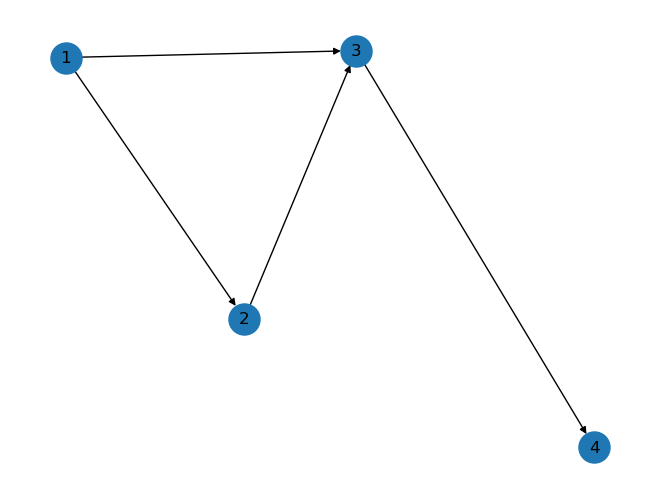

In [71]:
G = nx.DiGraph()
G.add_nodes_from([1, 2, 3, 4]) # add nodes
G.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4)]) # add edges
nx.draw(G,node_size=500,with_labels=True)

# 度，平均度，度分布

In [72]:
G=nx.Graph()
G.add_nodes_from([1,2,3,4])
G.add_edges_from([(1,2),(2,3),(2,4),(3,4)])

In [73]:
D = nx.degree(G) # 获取网络的度

In [74]:
D = dict(nx.degree(G))
print(D)
print(f"平均度为{sum(D.values())/len(G.nodes)}")

{1: 1, 2: 3, 3: 2, 4: 2}
平均度为2.0


In [75]:
# 获取度分布
nx.degree_histogram(G)

[0, 1, 2, 1]

In [76]:
import matplotlib.pyplot as plt

In [77]:
x = list(range(max(D.values())+1))
y = [i/len(G.nodes) for i in nx.degree_histogram(G)]
print(y)
print(x)

[0.0, 0.25, 0.5, 0.25]
[0, 1, 2, 3]


(0.0, 4.0)

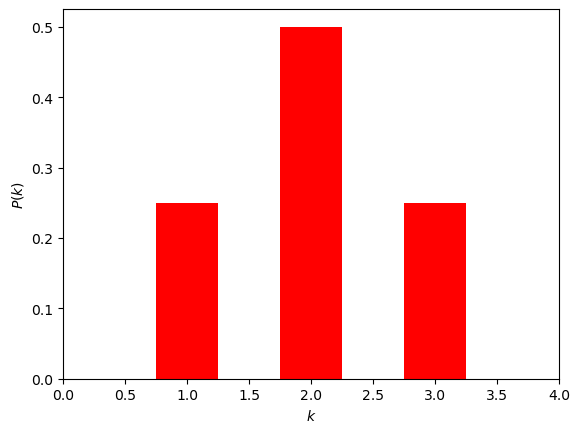

In [78]:
plt.bar(x,y,width=0.5,color='red')
plt.xlabel("$k$")
plt.ylabel("$P(k)$")
plt.xlim([0,4])

# 路径和距离

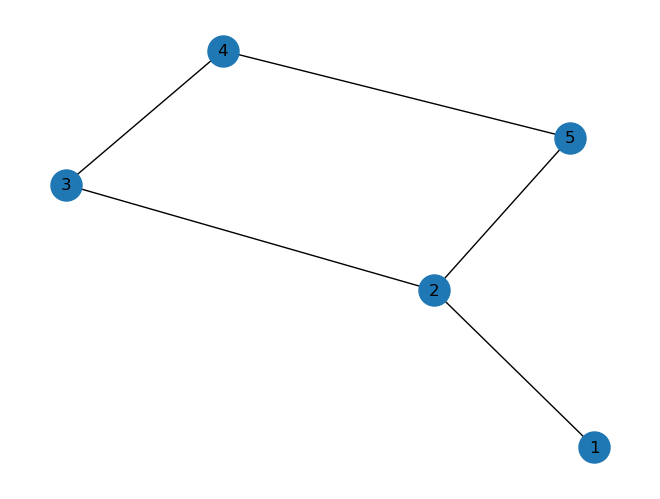

In [79]:
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4,5]) # add nodes
G.add_edges_from([(1, 2), (2, 3), (2, 5),(3,4),[4,5]]) # add edges
nx.draw(G,node_size=500,with_labels=True)


In [80]:
nx.shortest_path(G,1,4)

[1, 2, 3, 4]

In [81]:
# Get the shortest path length between nodes 1 and 4
nx.shortest_path_length(G, 1, 4)

3

In [82]:
nx.average_shortest_path_length(G)

1.6

# 连通性

In [85]:
Gb = nx.Graph()
Gb.add_nodes_from([1, 2, 3, 4, 5,6,7])
Gb.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4), (4, 7), (5, 6), (5, 7), (6, 7)])

In [86]:
Ga = nx.Graph()
Ga.add_nodes_from([1, 2, 3, 4, 5,6,7])
Ga.add_edges_from([(1, 2), (1, 3), (2, 3), (4, 7), (5, 6), (5, 7), (6, 7)])

In [87]:
print(nx.is_connected(Ga))
print(nx.is_connected(Gb))

False
True


# 集聚系数

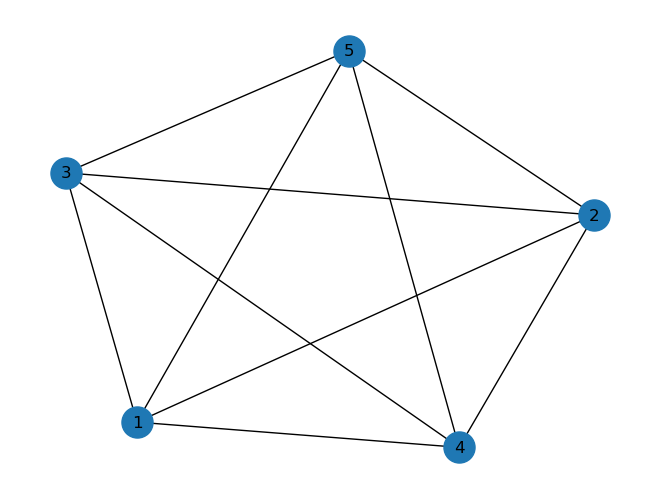

In [88]:
G=nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(1,2),(1,3),(1,4),(1,5),(2,3),(2,4),(2,5),(3,4),(3,5),(4,5)])
nx.draw(G,node_size=500,with_labels=True)

In [89]:
print(nx.clustering(G,1))

1.0


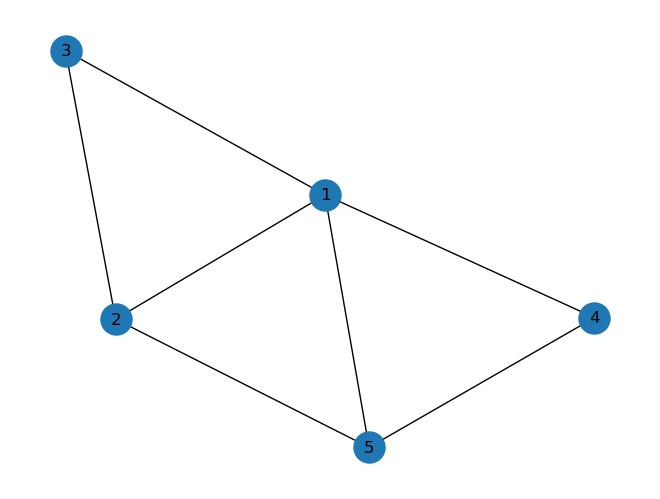

In [90]:
G.remove_edges_from([(2,4),(3,4),(3,5)])
nx.draw(G,node_size=500,with_labels=True)

In [91]:
print(nx.clustering(G,1))

0.5


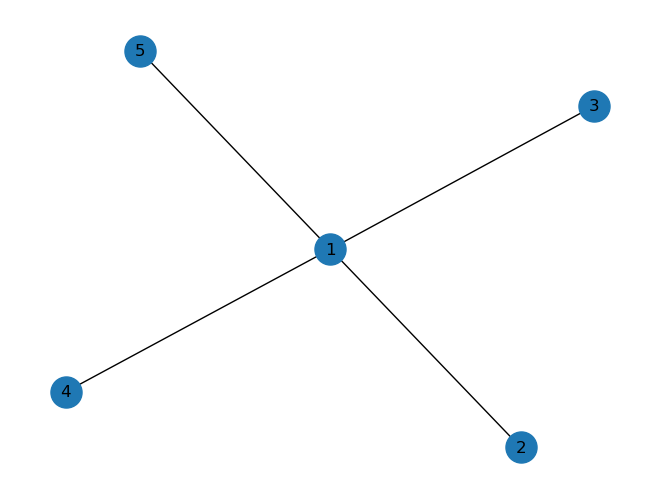

In [92]:
G.remove_edges_from([(2,3),(2,5),(4,5)])
nx.draw(G,node_size=500,with_labels=True)

In [93]:
print(nx.clustering(G,1))

0


# 平均集聚系数与全局集聚系数的区别

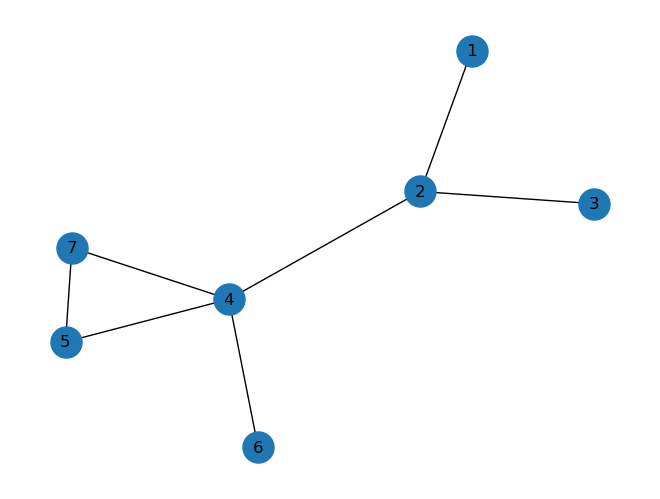

In [97]:
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5,6,7])
G.add_edges_from([(1, 2), (2, 3), (2, 4), (4, 5),(4,6),(4,7),(5,7)])
nx.draw(G,node_size=500,with_labels=True)

# 平均集聚系数

In [98]:
print(nx.average_clustering(G)) # 平均聚类系数
print(nx.transitivity(G)) # 全局聚类系数

0.3095238095238096
0.2727272727272727
